In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
ntypes = ['res']
nrnns = [1024]
stochlearns = [True]
nonlinearities = ['relu', 'phia', 'tanh']
lrs = [0.0, 1e-6, 2.5e-6, 5e-6, 7.5e-6, 1e-5, 2.5e-5, 5e-5, 7.5e-4, 1e-4]
seeds = 30
ncues = 20
chaos = 1.5

fig_dir = './figs/'
os.makedirs(fig_dir, exist_ok=True)

prefix = '261225'
data_dir = f'/n/netscratch/pehlevan_lab/Lab/mgk/schema/assoc_{prefix}'

errs = np.zeros([len(ntypes), len(nrnns), len(stochlearns), len(nonlinearities), len(lrs), seeds, ncues])

for nt, ntype in enumerate(ntypes):
    for nn, nrnn in enumerate(nrnns):
        for sl, stochlearn in enumerate(stochlearns):
            for nl, nonlinearity in enumerate(nonlinearities):
                for glr_idx, glr in enumerate(lrs):
                    for seed in range(seeds):

                        if ntype == 'ff':
                            exptname = f'ff_{nrnn}N_{nonlinearity}_{seed}s_{stochlearn}sl_{glr}glr'
                        else:
                            exptname = f'res_{nrnn}N_{nonlinearity}_{seed}s_{stochlearn}sl_{glr}glr_{chaos}ch'

                        try: 
                            filename = f'{data_dir}/{exptname}.npz'
                            data = np.load(filename)
                            errs[nt, nn, sl, nl, glr_idx, seed, :] = data['err'][1]
                        except FileNotFoundError:
                            print(f'File not found: {filename}')
                            errs[nt, nn, sl, nl, glr_idx, seed, :] = np.nan

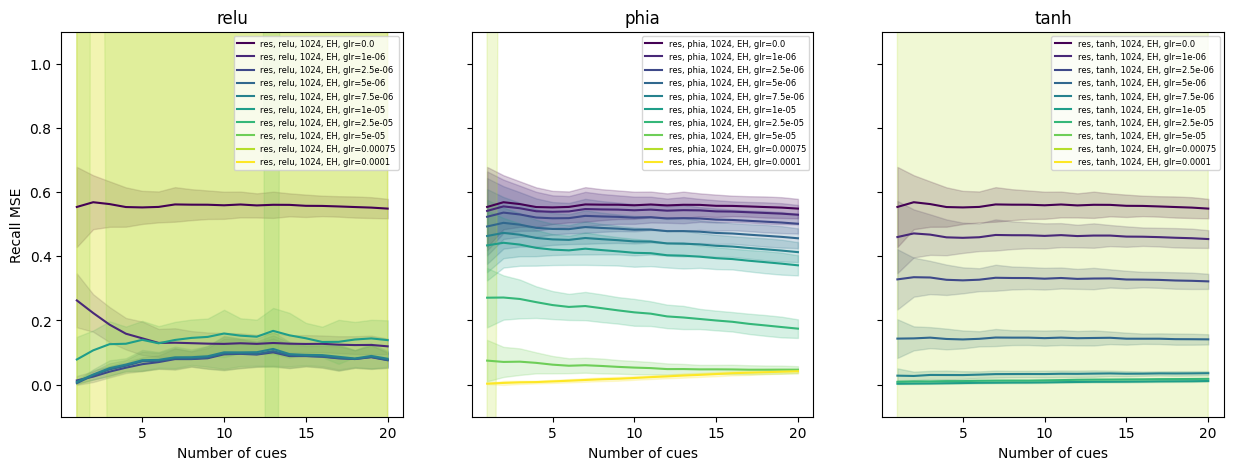

In [9]:
# create linear color for plotting using viridis
colors = plt.cm.viridis(np.linspace(0, 1, len(lrs)))


f,axs = plt.subplots(1, len(nonlinearities), figsize=(15,5), sharey=True)
for nl, nonlinearity in enumerate(nonlinearities):
        ax = axs[nl]
        for nt, ntype in enumerate(ntypes):
            for sl, stochlearn in enumerate(stochlearns):
                for glr_idx, glr in enumerate(lrs):
                    label = f'{ntype}, {nonlinearity}, {nrnns[0]}, {"EH" if stochlearn else "LMS"}, glr={glr}'
                    ax.plot(np.arange(1,ncues+1), np.nanmean(errs[nt, 0, sl, nl, glr_idx, :, :], axis=0), label=label, color=colors[glr_idx])
                    ax.fill_between(np.arange(1,ncues+1), 
                                    np.nanmean(errs[nt, 0, sl, nl, glr_idx, :, :], axis=0) - np.nanstd(errs[nt, 0, sl, nl, glr_idx, :, :], axis=0),
                                    np.nanmean(errs[nt, 0, sl, nl, glr_idx, :, :], axis=0) + np.nanstd(errs[nt, 0, sl, nl, glr_idx, :, :], axis=0),
                                    alpha=0.2,color=colors[glr_idx])
        ax.set_title(nonlinearity)
        ax.set_xlabel('Number of cues')
        ax.set_ylim([-0.1, 1.1])
        if nl == 0:
            ax.set_ylabel('Recall MSE')
        ax.legend(fontsize=6)

ValueError: x and y must have same first dimension, but have shapes (200,) and (30, 200)

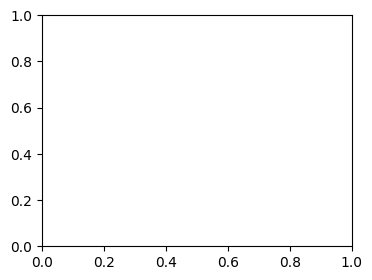

In [ ]:
# plot influence of nrnns
f,axs = plt.subplots(1,len(nrnns), figsize=(4*len(nrnns),3), sharey=True)

for nn, nrnn in enumerate(nrnns):
    ax = axs[nn]
    for nt, ntype in enumerate(ntypes):
        for sl, stochlearn in enumerate(stochlearns):
            for nl, nonlinearity in enumerate(nonlinearities):
                label = f'{ntype}, {nonlinearity}, {"EH" if stochlearn else "LMS"}'
                ax.plot(np.arange(1,ncues+1), np.nanmean(errs[nt, nn, sl, nl, :], axis=0), label=label)
    ax.set_title(f'N={nrnn}')
    ax.set_xlabel('Number of cues')
    ax.set_ylim([-0.1, 1.1])
    if nn == 0:
        ax.set_ylabel('Recall MSE')
    ax.legend(fontsize=6)
f.tight_layout()
f.savefig(f'{fig_dir}/combined_nrnns.png')

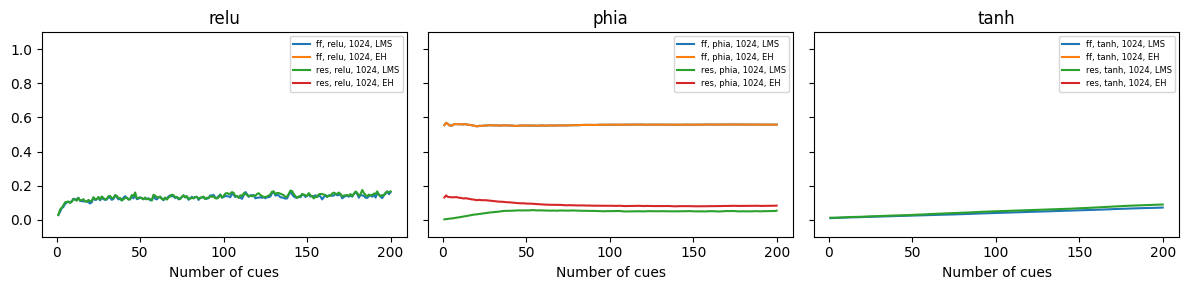

In [17]:
# plot influence of nonlinearity
f,axs = plt.subplots(1,len(nonlinearities), figsize=(4*len(nonlinearities),3), sharey=True)

for nl, nonlinearity in enumerate(nonlinearities):
    ax = axs[nl]
    for nt, ntype in enumerate(ntypes):
        for sl, stochlearn in enumerate(stochlearns):
            label = f'{ntype}, {nonlinearity}, {nrnns[nn]}, {"EH" if stochlearn else "LMS"}'
            ax.plot(np.arange(1,ncues+1), np.nanmean(errs[nt, nn, sl, nl, :], axis=0), label=label)
    ax.set_title(nonlinearity)
    ax.set_xlabel('Number of cues')
    ax.set_ylim([-0.1, 1.1])
    if nn == 0:
        ax.set_ylabel('Recall MSE')
    ax.legend(fontsize=6)
f.tight_layout()
f.savefig(f'{fig_dir}/combined_nonlinear.png')

In [30]:
errs[0, 1, :, 1, 0,0]

array([0.3990187, 0.3990187])

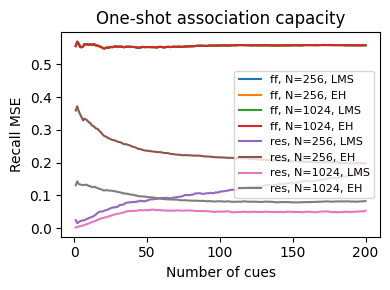

In [19]:
# plot only specific combination
# 1. FF, 256 N, phia, EH
# 2. FF, 256 N, phia, LMS
# 3. Res, 256 N, phia, EH
# 4. Res, 256 N, phia, LMS
# 5. FF, 1024 N, phia, EH
# 6. FF, 1024 N, phia, LMS
# 7. Res, 1024 N, phia, EH
# 8. Res, 1024 N, phia, LMS

f,ax = plt.subplots(1,1, figsize=(4,3))
for nt, ntype in enumerate(ntypes):
    for nn, nrnn in enumerate(nrnns):
        for sl, stochlearn in enumerate(stochlearns):
            nl = nonlinearities.index('phia')
            label = f'{ntype}, N={nrnn}, {"EH" if stochlearn else "LMS"}'
            ax.plot(np.arange(1,ncues+1), np.nanmean(errs[nt, nn, sl, nl, :], axis=0), label=label)
ax.set_xlabel('Number of cues')
ax.set_ylabel('Recall MSE')
ax.set_title('One-shot association capacity')
ax.legend(fontsize=8)
f.tight_layout()
f.savefig(f'{fig_dir}/combined_specific_phia.png')


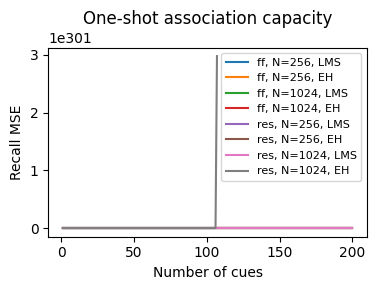

In [20]:
# plot only specific combination

f,ax = plt.subplots(1,1, figsize=(4,3))
for nt, ntype in enumerate(ntypes):
    for nn, nrnn in enumerate(nrnns):
        for sl, stochlearn in enumerate(stochlearns):
            nl = nonlinearities.index('relu')
            label = f'{ntype}, N={nrnn}, {"EH" if stochlearn else "LMS"}'
            ax.plot(np.arange(1,ncues+1), np.nanmean(errs[nt, nn, sl, nl, :], axis=0), label=label)
ax.set_xlabel('Number of cues')
ax.set_ylabel('Recall MSE')
ax.set_title('One-shot association capacity')
ax.legend(fontsize=8)
f.tight_layout()
f.savefig(f'{fig_dir}/combined_specific_relu.png')


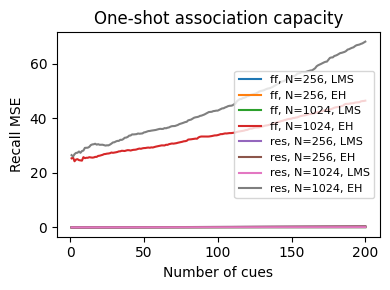

In [21]:
# plot only specific combination

f,ax = plt.subplots(1,1, figsize=(4,3))
for nt, ntype in enumerate(ntypes):
    for nn, nrnn in enumerate(nrnns):
        for sl, stochlearn in enumerate(stochlearns):
            nl = nonlinearities.index('tanh')
            label = f'{ntype}, N={nrnn}, {"EH" if stochlearn else "LMS"}'
            ax.plot(np.arange(1,ncues+1), np.nanmean(errs[nt, nn, sl, nl, :], axis=0), label=label)
ax.set_xlabel('Number of cues')
ax.set_ylabel('Recall MSE')
ax.set_title('One-shot association capacity')
ax.legend(fontsize=8)
f.tight_layout()
f.savefig(f'{fig_dir}/combined_specific_tanh.png')
